# ***Logistic Regression***

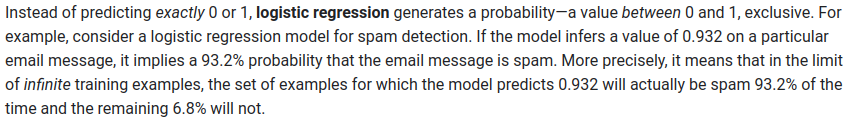

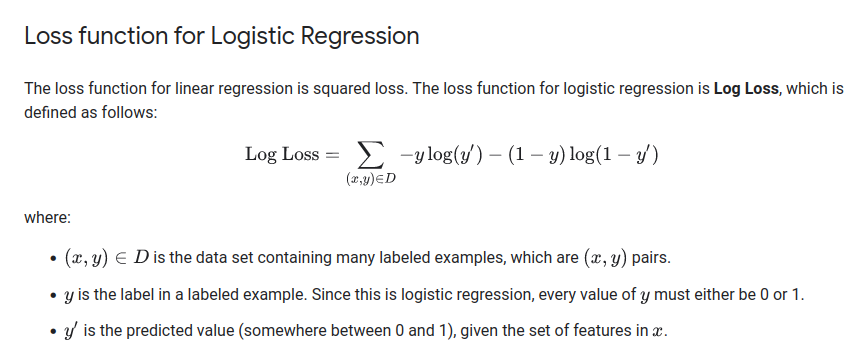

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,accuracy_score
import warnings
warnings.filterwarnings(action='ignore')


data = pd.read_csv('Bankcruptdata.csv')

X = data.drop('Bankrupt?',axis=1)
y = data['Bankrupt?']


#Splititng the data into the Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,stratify=y)
#stratify means dividing the data into same measures(i.e probability) as per the assigned value
#here we gave stratify=y that means divide the data as per the statics of y column
#in y the probability of 1's is 0.032 and 0's is 96.68
#so in X_train and X_test the data is splited in such a way that
#in y_train and y_test the probabilities of 0's and 1's become same as per the y

#checking the percentage of Bankruption
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

#Intantiating the Model
lr = LogisticRegression()

#fiting the Model
lr.fit(X_train,y_train)


#making the Prediction on Test Data
y_pred_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

#Calculatin the loss using LogLoss Functions
print("The Error using LogLoss Function",log_loss(y_test,y_pred_proba))
# Logloss is used beacuse the predictions are in 0 or 1 beacause it a classification problem

#checking the Accuracy
print("The Accuracy of the Logistic Regression Model is :",accuracy_score(y_test,y_pred))


0    0.967736
1    0.032264
Name: Bankrupt?, dtype: float64
0    0.967742
1    0.032258
Name: Bankrupt?, dtype: float64
The Error using LogLoss Function 0.23819314551027346
The Accuracy of the Logistic Regression Model is : 0.9618768328445748


The Error using LogLoss Function 0.23819314551027346
The Accuracy of the Logistic Regression Model is : 0.9618768328445748


# ***Stratified-k-Fold method***

In [ ]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

#Similar implementation using 'Statified K-fold' method
#it is a best suitable method for Classification Problem
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
lr = LogisticRegression()
results = cross_val_score(lr,X=X,y=y,cv=kfold,scoring='neg_log_loss')
print("Mean Result : ",results.mean());


Mean Result :  -0.18364317183010143


# ***Tunning the Penalty and Solver Parameter in LogisticRegression***

In [ ]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('Bankcruptdata.csv')

X = data.drop('Bankrupt?',axis=1)
y = data['Bankrupt?']
lr = LogisticRegression()

# penalties=['l1', 'l2', 'ElasticNet',None]
# params={'penalty':penalties}



params={'penalty':['l1','l2','ElasticNet',None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)


gcv = GridSearchCV(lr,param_grid=params,cv=kfold)

gcv.fit(X,y)
#print(gcv.cv_results_)
print("Best Parameter:",gcv.best_params_)
print("Best Result:", gcv.best_score_)


#for LogLoss
gcv = GridSearchCV(lr,param_grid=params,cv=kfold,scoring='neg_log_loss')

gcv.fit(X,y)
#print(gcv.cv_results_)
print("For LogLoss")
print("Best Parameter:",gcv.best_params_)
print("Best Result:", gcv.best_score_)

Best Parameter: {'penalty': 'l1', 'solver': 'liblinear'}
Best Result: 0.9689101150429339
For LogLoss
Best Parameter: {'penalty': 'l1', 'solver': 'liblinear'}
Best Result: -0.10877111920626863


# Breast Cancer Dataset

In [ ]:
data = pd.read_csv('BreastCancer.csv')

X= data.drop('Class',axis=1)
y= data['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,stratify=y)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

#Intantiating the Model
lr = LogisticRegression()

#fiting the Model
lr.fit(X_train,y_train)

#making the Prediction on Test Data
y_pred_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

#Calculatin the loss using LogLoss Functions
print("The Error using LogLoss Function",log_loss(y_test,y_pred_proba))
# Logloss is used beacuse the predictions are in 0 or 1 beacause it a classification problem

#checking the Accuracy
print("The Accuracy of the Logistic Regression Model is :",accuracy_score(y_test,y_pred))


# Tunning the penalty and solver paramters
from sklearn.model_selection import GridSearchCV

# penalties=['l1', 'l2', 'ElasticNet',None]
# params={'penalty':penalties}


params={'penalty':['l1','l2','ElasticNet',None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)


gcv = GridSearchCV(lr,param_grid=params,cv=kfold)

gcv.fit(X,y)
#print(gcv.cv_results_)
print("Best Parameter:",gcv.best_params_)
print("Best Result:", gcv.best_score_)


#for LogLoss
gcv = GridSearchCV(lr,param_grid=params,cv=kfold,scoring='neg_log_loss')

gcv.fit(X,y)
#print(gcv.cv_results_)
print("For LogLoss")
print("Best Parameter:",gcv.best_params_)
print("Best Result:", gcv.best_score_)


#Best Model Result
best_model = gcv.best_estimator_
print("Coefficients :",best_model.coef_)
print("Intercept :",best_model.intercept_)

Benign       0.65458
Malignant    0.34542
Name: Class, dtype: float64
Benign       0.657143
Malignant    0.342857
Name: Class, dtype: float64
The Error using LogLoss Function 0.6434696099567041
The Accuracy of the Logistic Regression Model is : 0.6571428571428571
Best Parameter: {'penalty': 'l1', 'solver': 'liblinear'}
Best Result: 0.962764645426516
For LogLoss
Best Parameter: {'penalty': 'l2', 'solver': 'newton-cg'}
Best Result: -0.10164953231416715


# Hr dataset

In [ ]:
data = pd.read_csv("HR_comma_sep.csv")

data=pd.get_dummies(data,drop_first=True)

X= data.drop('left',axis=1)
y= data['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,stratify=y)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

#Intantiating the Model
lr = LogisticRegression()

#fiting the Model
lr.fit(X_train,y_train)

#making the Prediction on Test Data
y_pred_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

#Calculatin the loss using LogLoss Functions
print("The Error using LogLoss Function",log_loss(y_test,y_pred_proba))
# Logloss is used beacuse the predictions are in 0 or 1 beacause it a classification problem

#checking the Accuracy
print("The Accuracy of the Logistic Regression Model is :",accuracy_score(y_test,y_pred))


# Tunning the penalty and solver paramters
from sklearn.model_selection import GridSearchCV

# penalties=['l1', 'l2', 'ElasticNet',None]
# params={'penalty':penalties}


params={'penalty':['l1','l2','ElasticNet',None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)


gcv = GridSearchCV(lr,param_grid=params,cv=kfold)

gcv.fit(X,y)
#print(gcv.cv_results_)
print("Best Parameter:",gcv.best_params_)
print("Best Result:", gcv.best_score_)


#for LogLoss
gcv = GridSearchCV(lr,param_grid=params,cv=kfold,scoring='neg_log_loss')

gcv.fit(X,y)
#print(gcv.cv_results_)
print("For LogLoss")
print("Best Parameter:",gcv.best_params_)
print("Best Result:", gcv.best_score_)


#Best Model Result
best_model = gcv.best_estimator_
print("Coefficients :",best_model.coef_)
print("Intercept :",best_model.intercept_)

0    0.762138
1    0.237862
Name: left, dtype: float64
0    0.76207
1    0.23793
Name: left, dtype: float64
The Error using LogLoss Function 0.43944839635648486
The Accuracy of the Logistic Regression Model is : 0.8018138170178715
Best Parameter: {'penalty': 'l2', 'solver': 'lbfgs'}
Best Result: 0.8024008002667555
For LogLoss
Best Parameter: {'penalty': 'l2', 'solver': 'newton-cholesky'}
Best Result: -0.429305155426844
